In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- 1. Load Data and Define Backtesting Period ---

prices = pd.read_csv('../data/processed_data.csv', index_col='Date', parse_dates=True)

# Define the backtesting window: the last year of available data
backtest_start_date = '2024-08-01'
backtest_end_date = '2025-07-31'

backtest_data = prices.loc[backtest_start_date:backtest_end_date]

# Calculate the daily returns for the assets during the backtest period
daily_returns = backtest_data.pct_change().dropna()


In [3]:
# --- 2. Define Portfolios (Strategy vs. Benchmark) ---

# --- Portfolio A: Our Optimized Strategy ---
strategy_weights = {
    'TSLA': 0.0,  
    'SPY': 0.46511,   
    'BND': 0.53489    
}
# Convert to a pandas Series for easier calculation
strategy_weights = pd.Series(strategy_weights)

print("--- Portfolio Definitions ---")
print("Strategy Weights (from Task 4):")
print(strategy_weights)

# --- Portfolio B: The Benchmark ---
benchmark_weights = {
    'TSLA': 0.0,
    'SPY': 0.60,
    'BND': 0.40
}
benchmark_weights = pd.Series(benchmark_weights)
print("\nBenchmark Weights:")
print(benchmark_weights)
print("-" * 30)

--- Portfolio Definitions ---
Strategy Weights (from Task 4):
TSLA    0.00000
SPY     0.46511
BND     0.53489
dtype: float64

Benchmark Weights:
TSLA    0.0
SPY     0.6
BND     0.4
dtype: float64
------------------------------


In [5]:
# --- 3. Simulate Daily Portfolio Performance ---

# Calculate the daily return of our strategy portfolio
daily_returns['Strategy'] = (daily_returns * strategy_weights).sum(axis=1)

# Calculate the daily return of the benchmark portfolio
daily_returns['Benchmark'] = (daily_returns * benchmark_weights).sum(axis=1)

print("\nDaily Returns for Backtest Period (first 5 days):")
print(daily_returns.head())
print("-" * 30)


Daily Returns for Backtest Period (first 5 days):
                 BND       SPY      TSLA  Strategy  Benchmark
Date                                                         
2024-08-02  0.011418 -0.018618 -0.042378 -0.002552  -0.006604
2024-08-05 -0.000941 -0.029124 -0.042327 -0.014049  -0.017851
2024-08-06 -0.006188  0.009220  0.008850  0.000978   0.003057
2024-08-07 -0.002436 -0.006684 -0.044258 -0.004412  -0.004985
2024-08-08 -0.001492  0.023117  0.036921  0.009954   0.013273
------------------------------


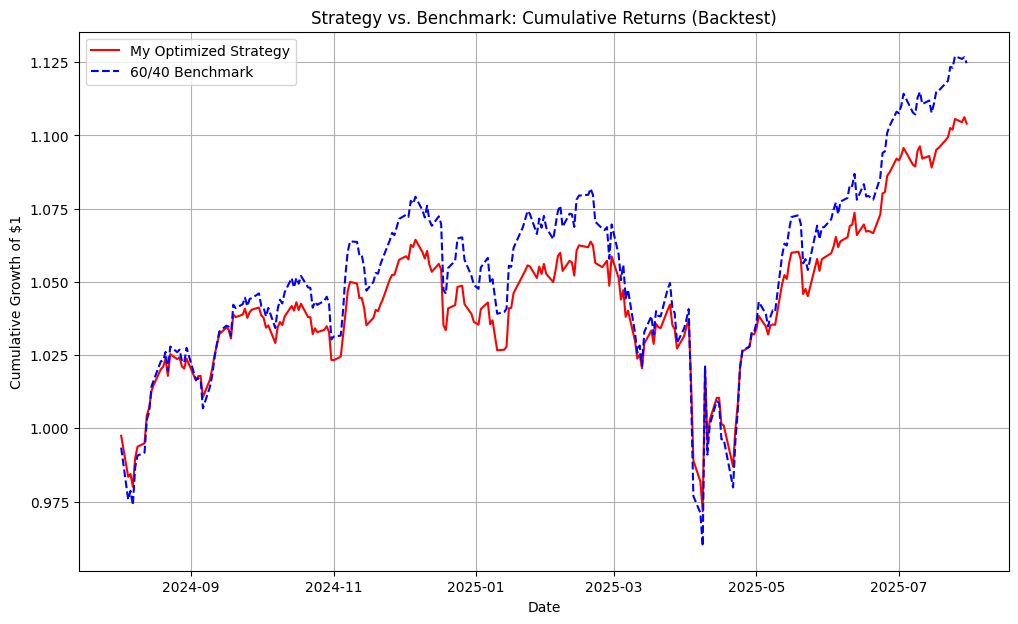

In [6]:
# --- 4. Analyze and Visualize Performance ---

# Calculate the cumulative returns for both portfolios
cumulative_returns = (1 + daily_returns[['Strategy', 'Benchmark']]).cumprod()

# --- Plot the results ---
plt.figure(figsize=(12, 7))
plt.plot(cumulative_returns['Strategy'], label='My Optimized Strategy', color='red')
plt.plot(cumulative_returns['Benchmark'], label='60/40 Benchmark', color='blue', linestyle='--')
plt.title('Strategy vs. Benchmark: Cumulative Returns (Backtest)')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth of $1')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# --- Calculate Final Performance Metrics ---

# Total Return
total_return_strategy = (cumulative_returns['Strategy'].iloc[-1] - 1) * 100
total_return_benchmark = (cumulative_returns['Benchmark'].iloc[-1] - 1) * 100

# Sharpe Ratio
sharpe_ratio_strategy = (daily_returns['Strategy'].mean() / daily_returns['Strategy'].std()) * np.sqrt(252)
sharpe_ratio_benchmark = (daily_returns['Benchmark'].mean() / daily_returns['Benchmark'].std()) * np.sqrt(252)


print("\n--- Backtest Performance Summary ---")
print(f"Optimized Strategy Total Return: {total_return_strategy:.2f}%")
print(f"Benchmark Portfolio Total Return: {total_return_benchmark:.2f}%")
print("-" * 20)
print(f"Optimized Strategy Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
print(f"Benchmark Portfolio Sharpe Ratio: {sharpe_ratio_benchmark:.2f}")
print("-" * 30)


--- Backtest Performance Summary ---
Optimized Strategy Total Return: 10.41%
Benchmark Portfolio Total Return: 12.47%
--------------------
Optimized Strategy Sharpe Ratio: 1.06
Benchmark Portfolio Sharpe Ratio: 1.02
------------------------------
